\***\*============================GRAPH PREPROCESSING============================**


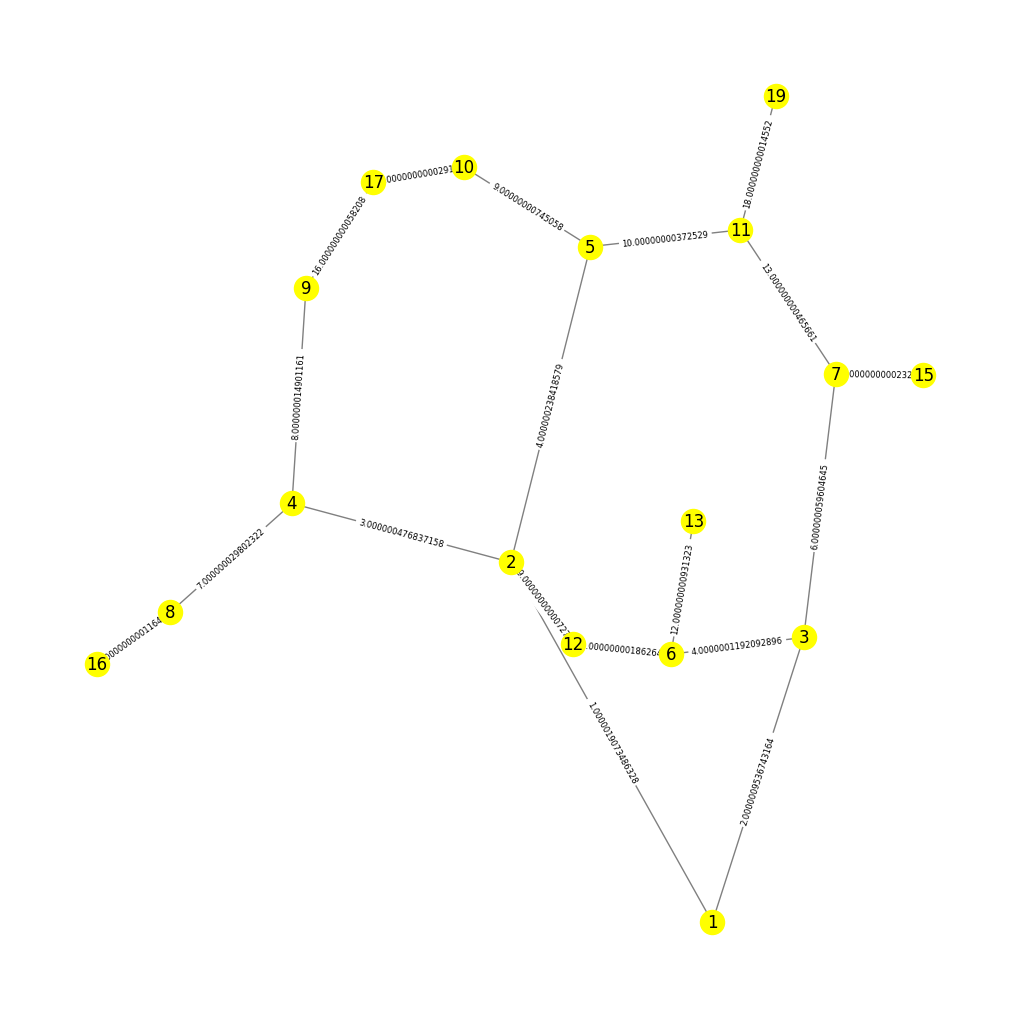

In [41]:
# Example usage
import networkx as nx
import matplotlib.pyplot as plt


# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight


def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))


# num_nodes = 10

# Define a small fraction
fraction = []
for i in range(19):
    fraction.append(1/(2 ** (19+i)))

# Generate edges with unique weights
edges = [
    Edge(1, 2, 1 + fraction[0]),
    Edge(1, 3, 2 + fraction[1]),
    Edge(2, 4, 3 + fraction[2]),
    Edge(2, 5, 4 + fraction[3]),
    Edge(3, 6, 4 + fraction[4]),
    Edge(3, 7, 6 + fraction[5]),
    Edge(4, 8, 7 + fraction[6]),
    Edge(4, 9, 8 + fraction[7]),
    Edge(5, 10, 9 + fraction[8]),
    Edge(5, 11, 10 + fraction[9]),
    Edge(6, 12, 11 + fraction[10]),
    Edge(6, 13, 12 + fraction[11]),
    Edge(7, 11, 13 + fraction[12]),
    Edge(7, 15, 14 + fraction[13]),
    Edge(8, 16, 15 + fraction[14]),
    Edge(9, 17, 16 + fraction[15]),
    Edge(10, 17, 17 + fraction[16]),
    Edge(11, 19, 18 + fraction[17]),
    Edge(12, 2, 19 + fraction[18]),
]
G = nx.Graph()
# Add edges to the graph
for edge in edges:
    G.add_edge(edge.u, edge.v, weight=edge.weight)

# Preprocess the graph
D = preprocess_graph(G)

# Create a new figure with a larger size
plt.figure(figsize=(10, 10))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray"
)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.show()
# print(D)

=================================== Distance Oracle =====================================


In [42]:
class DistanceOracle:
    def __init__(self, distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances

    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))

    def __getitem__(self, key):
        return self.data[key]

    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance

    def add_edge(u, v, weight):
        G.add_edge(u, v, weight=weight)

    def get_edge_weight(G, u, v):
        if G.has_edge(u, v):
            return G[u][v]['weight']
        else:
            return None

In [43]:
# Create an instance of
distance_oracle = DistanceOracle(D)

\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [44]:
import networkx as nx


def store_shortest_paths(G):
    shortest_paths = {}
    for u in G.nodes:
        for v in G.nodes:
            if u == v:
                shortest_paths[(u, v)] = [u]
            else:
                try:
                    path = nx.dijkstra_path(G, u, v, weight='weight')
                    shortest_paths[(u, v)] = path
                    # reverse path for (v, u)
                    shortest_paths[(v, u)] = path[::-1]
                except nx.NetworkXNoPath:
                    shortest_paths[(u, v)] = None
                    shortest_paths[(v, u)] = None
    return shortest_paths


shortest_paths = store_shortest_paths(G)

# Now you can access the shortest path between any pair of nodes like this:
print(shortest_paths[(13, 19)])
# this will give the reverse of the path from 13 to 19
print(shortest_paths[(19, 13)])

[13, 6, 3, 1, 2, 5, 11, 19]
[19, 11, 5, 2, 1, 3, 6, 13]


---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [45]:
import math


def nearest_power_of_2(x):
    if x <= 0:
        return 1  # Return 1 for non-positive input
    elif math.isinf(x):
        return float('inf')  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [46]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]

    X.append(x)
    # F = list(F)

    if F:
        u = min(F, key=lambda v: nearest_power_of_2(
            distance_oracle.get_distance(x, v)))
    else:
        print("F is empty")
        # handle the case when F is empty, e.g., by setting u to a default value or raising an error

    # print(u)

    while True:

        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break

        if y is not None:
            X.append(y)
            x = y
        else:
            break

    return X

In [47]:
m = FINDJUMP([13, 6, 3, 7, 11, 19], {6, 3})
print(m)

[13, 6, 3, 7, 11, 19]


**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [48]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return None

In [49]:
# import networkx as nx


# def maximizer(x, y, d1, d2):

#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_path_new = None
#     # xy_distance = distance_oracle.get_distance(x, y)
#     # make the set of edges in xy path
#     if nx.has_path(G, x, y):
#         # Get the path and its length
#         path = shortest_paths[(x, y)]
#         # print(path)
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i + 1]
#             edge = (u, v)
#             edges_set.add(edge)
#     # print(edges_set)
#     # check max edges in edge list
#     for u, v in edges_set:

#         # Check if the distance from x to the edge and y to the edge are at least d1 and d2
#         if (
#             nx.has_path(G, x, u)
#             and nx.has_path(G, y, v)
#             and (distance_oracle.get_distance(x, u) >= d1
#                  and distance_oracle.get_distance(y, v) >= d2)
#             # or (distance_oracle.get_distance(x, u) >= d2
#             #     and distance_oracle.get_distance(y, v) >= d1)
#         ):

#             max_edge1 = (u, v)
#             max_edges.add(max_edge1)

#     # print(max_edges)

#     for u, v in max_edges:

#         max_xy_distance = float('-inf')
#         # Remove the (u, v) edge
#         original_weight = get_edge_weight(G, u, v)
#         # print(original_weight)

#         if G.has_edge(u, v):
#             G.remove_edge(u, v)


#         # Calculate the xy path distance
#         D = preprocess_graph(G)
#         distance_oracle_new = DistanceOracle(D)

#         if nx.has_path(G, x, y):
#             xy_path = nx.shortest_path(G, x, y)
#             max_uv_distance = distance_oracle_new.get_distance(x, y)
#             if (max_uv_distance >= max_xy_distance):
#                 max_xy_edge = (u, v)
#                 max_xy_path = xy_path
#         # Add the (u, v) edge back to the graph
#         G.add_edge(u, v, weight=original_weight)
#         D = preprocess_graph(G)
#     # distance_oracle=DistanceOracle(D)

#     # chandge max_xy_path to 2D-composable form
#     if max_xy_path is not None:
#         for i in range(len(max_xy_path)-1):
#             # max_xy_path_new =[]
#             u = max_xy_path[0]
#             v = max_xy_path[i+1]
#             if all(node in max_xy_path for node in shortest_paths[(u, v)]):
#                 continue
#             else:
#                 intermediate_edge = (max_xy_path[i], v)
#                 s_to_a_path = [u, max_xy_path[i]]
#                 b_to_t_path = [v, max_xy_path[len(max_xy_path)-1]]
#                 max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path

#     return max_xy_edge, max_xy_path_new

In [50]:
import networkx as nx


def maximizer(x, y, d1, d2):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (distance_oracle.get_distance(x, u) >= d1
                 and distance_oracle.get_distance(y, v) >= d2)
            # or (distance_oracle.get_distance(x, u) >= d2
            #     and distance_oracle.get_distance(y, v) >= d1)
        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    # print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G, u, v)
        # print(original_weight)

        if G.has_edge(u, v):
            G.remove_edge(u, v)

        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        if nx.has_path(G, x, y):
            xy_path = nx.shortest_path(G, x, y)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if (max_uv_distance >= max_xy_distance):
                max_xy_edge = (u, v)
                max_xy_path = xy_path
        # Add the (u, v) edge back to the graph
        G.add_edge(u, v, weight=original_weight)
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)

    # chandge max_xy_path to 2D-composable form
    if max_xy_path is not None:
        for i in range(len(max_xy_path)-1):
            # max_xy_path_new =[]
            u = max_xy_path[0]
            v = max_xy_path[i+1]
            if all(node in max_xy_path for node in shortest_paths[(u, v)]):
                continue
            else:
                intermediate_edge = (max_xy_path[i], v)
                # print(intermediate_edge)
                s_to_a_path = shortest_paths[(u, max_xy_path[i])]
                # print(s_to_a_path)
                b_to_t_path = shortest_paths[(
                    v, max_xy_path[len(max_xy_path)-1])]
                # print(b_to_t_path)
                max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path

    return max_xy_edge, max_xy_path_new

In [51]:
maximizer(13, 19, 4, 4)

((2, 5), ([13, 6, 3, 1, 2, 5, 11], (11, 19), [19]))

==============================MAXIMIZER Storage=========================================


In [52]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in distance_oracle.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [53]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = []
i = nearest_power_of_2((max_d_value))

while i >= 1:
    d1_d2_list.append(i)
    i //= 2

In [54]:


# Initialize a dictionary to store the maximizer output
function_dict = {
    'maximizer': maximizer  # Replace 'maximizer' with the actual function name
}
maximizer_dict = {}

# Iterate over all pairs of nodes in the graph
for x in G.nodes:
    for y in G.nodes:
        # if x != y:  # we don't want pairs of the same node
        # Iterate over all possible d1 and d2 values
        for d1 in d1_d2_list:
            for d2 in d1_d2_list:
                try:
                    # Call the maximizer function and store the result
                    result = function_dict['maximizer'](x, y, d1, d2)
                    if result is not None:
                        max_edge, max_path = result
                        # Store the result in the results dictionary
                        maximizer_dict[(x, y, d1, d2)] = (max_edge, max_path)
                except nx.NetworkXNoPath:
                    print(f"No path between {x} and {y}.")
# print(maximizer_dict)

In [55]:
shortest_paths[(1, 16)]

[1, 2, 4, 8, 16]

In [56]:
maximizer_dict[(13, 19, 16, 16)]

((5, 11), ([13, 6, 3, 1, 2, 5, 11], (11, 19), [19]))

===============================MAIN: QUERY FUNCTION====================================


In [57]:
# def is_valid_path(G, path):
#     return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1)) and (len(path) < 2 or G.has_edge(path[-2], path[-1]))

# def remove_duplicates(lst):
#     seen = set()
#     result = []
#     for item in lst:
#         if item not in seen:
#             seen.add(item)
#             result.append(item)
#     return result

# def QUERY(s, t, e):
#     # Check if the edge e is in the graph
#     if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
#         print("The edge to avoid is not in the graph.")
#         return [], float('inf')

#     # Check if there is a valid path between s and t
#     if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
#         print("There is no valid path between the source and destination vertices.")
#         return [], float('inf')

#     JUMP_st = FINDJUMP(shortest_paths[(s, t)], {e.u, e.v})
#     JUMP_ts = FINDJUMP(shortest_paths[(t, s)], {e.u, e.v})
#     # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")

#     final_shortest_path = []
#     shortest_path_distance = float("inf")

#     for x in JUMP_st:
#         for y in JUMP_ts:
#             if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
#                 e.u, e.v = e.v, e.u
#             d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
#             d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))
#             # print(f"d1={d1}, d2={d2}")
#             e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
#             # print(f"e_star={e_star}, xy_e_star={xy_e_star}")

#             if xy_e_star is None:
#                 xy_e_star =[]
#             else:
#                 # xy_e_star = [item for sublist in xy_e_star for item in sublist]
#                 xy_e_star = [shortest_paths[(xy_e_star[i][0], xy_e_star[i][-1])] for i in range(len(xy_e_star))]
#                 xy_e_star = [item for sublist in xy_e_star for item in sublist]# Flatten the list of lists
#             print(f"xy_e_star={xy_e_star}")
#             sx_path = shortest_paths[(s, x)]
#             yt_path = shortest_paths[(y, t)]

#             # print(f"sx_path={sx_path}, yt_path={yt_path}")

#             if sx_path is None or yt_path is None:
#                 continue  # Skip if there is no valid path from s to x or y to t
#             # if xy_e_star is  None:
#             #     P = remove_duplicates(sx_path + yt_path)
#             # else :
#             #     # xy_e_star_list = [item for sublist in xy_e_star for item in sublist]

#             #     xy_e_star_path = [shortest_paths[(xy_e_star[i][0], xy_e_star[i][-1])] for i in range(len(xy_e_star))]
#             #     xy_e_star_path = [item for sublist in xy_e_star_path for item in sublist]
#             #     print(f"xy_e_star_path={xy_e_star_path}")
#                 # P = remove_duplicates(sx_path + xy_e_star_path + yt_path)
#             P = remove_duplicates(sx_path + xy_e_star + yt_path)


#             print(f"P={P}")

#             if is_valid_path(G, P):
#                 p_distance = sum(get_edge_weight(G, P[i], P[i+1]) for i in range(len(P) - 1))
#                 # print(f"p_distance={p_distance}")
#             else:
#                 p_distance = float('inf')

#             # # Check if e is not in P and the distance of P is shorter than the current shortest path


#             # if xy_e_star is not None and len(xy_e_star) >= 3:
#             #     s_a_distance = shortest_paths[(xy_e_star[0][0], xy_e_star[0][-1])]
#             #     a_b_distance = shortest_paths[(xy_e_star[1][0], xy_e_star[1][-1])]
#             #     b_t_distance = shortest_paths[(xy_e_star[2][0], xy_e_star[2][-1])]
#             # else:
#             #     s_a_distance = 0
#             #     a_b_distance = 0
#             #     b_t_distance = 0

#             # s_t_distance = shortest_paths[(s, t)]
#             # if (s_a_distance + a_b_distance + b_t_distance) == s_t_distance and p_distance < shortest_path_distance:
#             #     final_shortest_path = P
#             #     shortest_path_distance = p_distance

#             # Check if e is not in P and the distance of P is shorter than the current shortest path
#             if (e.u, e.v) not in zip(P, P[1:]) and (e.v, e.u) not in zip(P, P[1:]) and p_distance < shortest_path_distance:
#                 final_shortest_path = P
#                 shortest_path_distance = p_distance

#     return final_shortest_path, shortest_path_distance

In [58]:

def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1)) and (len(path) < 2 or G.has_edge(path[-2], path[-1]))


def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result


def QUERY(s, t, e):
    # Check if the edge e is in the graph
    if e == []:
        return shortest_paths[(s, t)]

    # print(e)

    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        print("The edge to avoid is not in the graph.")
        return shortest_paths[(s, t)]
    if distance_oracle.get_distance(s, e.u) > distance_oracle.get_distance(s, e.v):
        e.u, e.v = e.v, e.u

    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        print("There is no valid path between the source and destination vertices.")
        return [], float('inf')

    JUMP_st = FINDJUMP(shortest_paths[(s, t)], {e.u, e.v})
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], {e.u, e.v})
    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")

    final_shortest_path = []
    shortest_path_distance = float("inf")

    for x in JUMP_st:
        for y in JUMP_ts:

            d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
            d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # print(f"e_star={e_star}, xy_e_star={xy_e_star}")

            if xy_e_star is None:
                xy_e_star = []
            else:
                # Flatten the list of lists
                xy_e_star = [item for sublist in xy_e_star for item in sublist]
            # print(f"xy_e_star={xy_e_star}")
            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]

            # print(f"sx_path={sx_path}, yt_path={yt_path}")

            if sx_path is None or yt_path is None:
                continue  # Skip if there is no valid path from s to x or y to t

            P = remove_duplicates(sx_path + xy_e_star + yt_path)
            # print(f"P={P}")

            if is_valid_path(G, P):
                p_distance = sum(get_edge_weight(
                    G, P[i], P[i+1]) for i in range(len(P) - 1))
                # print(f"p_distance={p_distance}")
            else:
                p_distance = float('inf')

            # Check if e is not in P and the distance of P is shorter than the current shortest path
            if (e.u, e.v) not in zip(P, P[1:]) and (e.v, e.u) not in zip(P, P[1:]) and p_distance < shortest_path_distance:
                final_shortest_path = P
                shortest_path_distance = p_distance

    return final_shortest_path

==================================== USer Input & FINAL OUTPUT =================================


In [59]:
# # Get user input for source and destination vertices
# try:
#     s, t = map(int, input("Enter source and destination vertices (s t): ").split())
# except ValueError:
#     print("Invalid input. Please enter two integers separated by a space.")
#     exit()

# # Get user input for the edge to avoid and its weight1


# try:
#     e_u, e_v = map(int, input("Enter the edge to avoid and its weight (u v): ").split())
# except ValueError:
#     print("Invalid input. Please enter two integers separated by a space.")
#     exit()

# # Check if the vertices and the edge exist in the graph
# if not (G.has_node(s) and G.has_node(t) and (G.has_edge(e_u, e_v) or G.has_edge(e_v, e_u))):
#     print("Invalid input. The vertices or the edge do not exist in the graph.")
#     exit()

# #Create an Edge object for the edge to avoid
# e = Edge(e_u, e_v, distance_oracle.get_distance(e_u, e_v))
# # e=(e_u,e_v)

# # Call the QUERY function with the instance of DistanceOracle
# path = QUERY(s, t, e)

# # Print the path
# if path is None:
#     print("No path found.")
# else:
#     print("Path:", path)

**Check Corretness of path between s to t after avoiding edg**


In [60]:
# try:
#     if G.has_edge(e_u, e_v):
#         G.remove_edge(e_u, e_v)

#     st_path = nx.dijkstra_path(G, s, t, weight='weight')
# except nx.NetworkXNoPath:
#     st_path = []

# print(st_path)

#**-----------------2-fault distance oracle----------------**


##Basic Function


In [61]:
f = 2

In [62]:
def edge_in_path(p, F2):
    for edge in F2:
        if edge.u in p and edge.v in p:
            return True
    return False


def bfs_tree_from_x_to_u(graph, x, u):
    # Generate BFS tree rooted at x
    bfs_tree_x = nx.bfs_tree(graph, x)

    # Check if u is in the BFS tree rooted at x
    if u in bfs_tree_x.nodes:
        # Generate BFS tree rooted at u from the BFS tree rooted at x
        bfs_tree_u = nx.bfs_tree(bfs_tree_x, u)
        bfs_tree_u_nodes = list(bfs_tree_u.nodes)
        return bfs_tree_u_nodes
    else:
        print(f"Node {u} is not in the BFS tree rooted at {x}")
        return None


def intact_from_failure_path(path, F):
    # Check if any edge in F is in the path
    for edge in F:
        if edge.u in path and edge.v in path:
            return False
    return True


def intact_from_failure_tree(T, F):
    # Check if any vertex in F is in the tree T
    for edge in F:
        # unpack edge into u and v
        if isinstance(edge, Edge):
            u, v = edge.u, edge.v
        else:
            u, v = edge
        if u in T or v in T:
            return False


def single_edge_in_path(p, F2):
    if p is not None:
        for edge in F2:
            # unpack edge into u and v
            if isinstance(edge, Edge):
                u, v = edge.u, edge.v
            else:
                u, v = edge
            # check if the edge is in the path
            if (u, v) in zip(p, p[1:]) or (v, u) in zip(p, p[1:]):
                return True
        return False

In [63]:
intact_from_failure_path(shortest_paths[(13, 19)], [Edge(6, 12, get_edge_weight(G, 6, 12)),
      Edge(3, 7, get_edge_weight(G, 3, 7))])
print(bfs_tree_from_x_to_u(G, 13, 19))

[19]


#Maximizer Functions

In [64]:
import networkx as nx


def maximizer1(x, y, d1, d2):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (distance_oracle.get_distance(x, u) >= d1
                 and distance_oracle.get_distance(y, v) >= d2)
            # or (distance_oracle.get_distance(x, u) >= d2
            #     and distance_oracle.get_distance(y, v) >= d1)
        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    max_edges = list(max_edges)
    max_edges_2 = []
    for i in range(len(max_edges)):
        for j in range(i+1, len(max_edges)):
            max_edges_2.append((max_edges[i], max_edges[j]))
    # print(max_edges_2)
        
    for e1, e2 in max_edges_2:
        
        max_xy_distance = float('-inf')
        # Remove the (u, v) edg
        original_weight1 = get_edge_weight(G, e1[0], e1[1])
        original_weight2 = get_edge_weight(G, e2[0], e2[1])
        # print(original_weight)

        if G.has_edge(e1[0], e2[1]) and G.has_edge(e2[0], e2[1]):
            G.remove_edge(e1[0], e1[1])
            G.remove_edge(e2[0], e2[1])
            

        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        if nx.has_path(G, x, y):
            xy_path = nx.shortest_path(G, x, y)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if (max_uv_distance >= max_xy_distance):
                max_xy_edge = (e1, e2)
                max_xy_path = xy_path
        # Add the (u, v) edge back to the graph
        G.add_edge(e1[0], e1[1], weight=original_weight1)
        G.add_edge(e2[0], e2[1], weight=original_weight2)
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)

    # chandge max_xy_path to 2D-composable form
    if max_xy_path is not None:
        for i in range(len(max_xy_path)-1):
            # max_xy_path_new =[]
            u = max_xy_path[0]
            v = max_xy_path[i+1]
            if all(node in max_xy_path for node in shortest_paths[(u, v)]):
                continue
            else:
                intermediate_edge = (max_xy_path[i], v)
                # print(intermediate_edge)
                s_to_a_path = shortest_paths[(u, max_xy_path[i])]
                # print(s_to_a_path)
                b_to_t_path = shortest_paths[(
                    v, max_xy_path[len(max_xy_path)-1])]
                # print(b_to_t_path)
                max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path

    return max_xy_edge, max_xy_path_new

In [65]:
maximizer1(13, 19, 4, 4)

(((6, 3), (2, 5)), ([13, 6, 3, 1, 2, 5, 11], (11, 19), [19]))

In [66]:
import networkx as nx


def maximizer2(x, y, d1, v, F_star):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (distance_oracle.get_distance(x, u) >= d1
                 and intact_from_failure_path(shortest_paths[(y, v)], F_star) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, y, v), F_star))

        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    # print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G, u, v)
        # print(original_weight)

        if G.has_edge(u, v):
            G.remove_edge(u, v)

        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        if nx.has_path(G, x, y):
            xy_path = nx.shortest_path(G, x, y)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if (max_uv_distance >= max_xy_distance):
                max_xy_edge = (u, v)
                max_xy_path = xy_path
        # Add the (u, v) edge back to the graph
        G.add_edge(u, v, weight=original_weight)
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)

    # chandge max_xy_path to 2D-composable form
    if max_xy_path is not None:
        for i in range(len(max_xy_path)-1):
            # max_xy_path_new =[]
            u = max_xy_path[0]
            v = max_xy_path[i+1]
            if all(node in max_xy_path for node in shortest_paths[(u, v)]):
                continue
            else:
                intermediate_edge = (max_xy_path[i], v)
                # print(intermediate_edge)
                s_to_a_path = shortest_paths[(u, max_xy_path[i])]
                # print(s_to_a_path)
                b_to_t_path = shortest_paths[(
                    v, max_xy_path[len(max_xy_path)-1])]
                # print(b_to_t_path)
                max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path

    return max_xy_edge, max_xy_path_new


In [67]:
maximizer2(13, 19, 4, 4, {Edge(1, 16, 15)})

(None, None)

In [68]:
import networkx as nx


def maximizer3(x, y, u, v, F_star):
    

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and intact_from_failure_path(shortest_paths[(x, u)], F_star) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, y, v), F_star)
            and intact_from_failure_path(shortest_paths[(y, v)], F_star) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, y, v), F_star)

        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    # print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G, u, v)
        # print(original_weight)

        if G.has_edge(u, v):
            G.remove_edge(u, v)

        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        if nx.has_path(G, x, y):
            xy_path = nx.shortest_path(G, x, y)
            max_uv_distance = distance_oracle_new.get_distance(x, y)
            if (max_uv_distance >= max_xy_distance):
                max_xy_edge = (u, v)
                max_xy_path = xy_path
        # Add the (u, v) edge back to the graph
        G.add_edge(u, v, weight=original_weight)
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)

    # chandge max_xy_path to 2D-composable form
    if max_xy_path is not None:
        for i in range(len(max_xy_path)-1):
            # max_xy_path_new =[]
            u = max_xy_path[0]
            v = max_xy_path[i+1]
            if all(node in max_xy_path for node in shortest_paths[(u, v)]):
                continue
            else:
                intermediate_edge = (max_xy_path[i], v)
                # print(intermediate_edge)
                s_to_a_path = shortest_paths[(u, max_xy_path[i])]
                # print(s_to_a_path)
                b_to_t_path = shortest_paths[(
                    v, max_xy_path[len(max_xy_path)-1])]
                # print(b_to_t_path)
                max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path

    return max_xy_edge, max_xy_path_new

In [69]:
print(maximizer3(13, 19, 2, 4, {Edge(1, 16, 15)}))

(None, None)


=====================================Findpath Function=============================

In [70]:



def FINDPATHS(s, t, F2):

    F_prime = []

    P = []

    for i in range(1, f + 1):
        flag = 0
        if F_prime:

            u, v, weight = F_prime[
                i-2].u, F_prime[i-2].v, F_prime[i-2].weight
            P_i = QUERY(s, t, Edge(u, v, weight))
            # print(f"u:{u}, v:{v}, weight:{weight}")
            
        else:
            P_i = QUERY(s, t, F_prime)

        P.append(P_i)

        weight_p_i = sum(get_edge_weight(
            G, P_i[i], P_i[i+1]) for i in range(len(P_i) - 1))

        if F_prime:
            F2.remove(F_prime[i-2])  # Use remove instead of subtraction
        else:
            F2 = F2

        for e1 in F2:

            if F_prime:

                R1 = QUERY(s, e1.u, Edge(u, v, weight))
                R2 = QUERY(e1.v, t, Edge(u, v, weight))
            else:
                R1 = QUERY(s, e1.u, F_prime)
                R2 = QUERY(e1.v, t, F_prime)

            weight_R1 = sum(get_edge_weight(
                G, R1[i], R1[i+1]) for i in range(len(R1) - 1))

            weight_R2 = sum(get_edge_weight(
                G, R2[i], R2[i+1]) for i in range(len(R2) - 1))

            weight_e = get_edge_weight(G, e1.u, e1.v)

            if weight_R1 + weight_e + weight_R2 == weight_p_i:

                F_prime.append(e1)
                flag = 1
                # print(f"flag: {flag}")

                break

        if flag == 0:
            return P

    return P

In [71]:

F2 = [Edge(6, 3, get_edge_weight(G, 3, 7)),
      Edge(2, 5, get_edge_weight(G, 2, 5))]
FINDPATHS(9, 15, F2)

[[9, 4, 2, 1, 3, 7, 15]]

In [72]:
# import networkx as nx


# def maximizer2(x, y, d1, V, F_star):

#     max_edges = set()
#     edges_set = set()
#     max_xy_edge = None
#     max_xy_path = None
#     max_xy_path_new = None
#     # xy_distance = distance_oracle.get_distance(x, y)
#     # make the set of edges in xy path
#     if nx.has_path(G, x, y):
#         # Get the path and its length
#         path = shortest_paths[(x, y)]
#         # print(path)
#         for i in range(len(path) - 1):
#             u = path[i]
#             v = path[i + 1]
#             edge = (u, v)
#             edges_set.add(edge)
#     # print(edges_set)
#     # check max edges in edge list
#     for u, v in edges_set:

#         # Check if the distance from x to the edge and y to the edge are at least d1 and d2
#         if (
#             nx.has_path(G, x, u)
#             and nx.has_path(G, y, v)
#             and (distance_oracle.get_distance(x, u) >= d1
#                  and intact_from_failure_path(shortest_paths[(y, V)], F_star) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, y, V), F_star))

#         ):

#             max_edge1 = (u, v)
#             max_edges.add(max_edge1)

#     # print(max_edges)

#     for u, v in max_edges:

#         max_xy_distance = float('-inf')
#         # Remove the (u, v) edge
#         original_weight = get_edge_weight(G, u, v)
#         # print(original_weight)

#         if G.has_edge(u, v):
#             G.remove_edge(u, v)

#         # Calculate the xy path distance
#         D = preprocess_graph(G)
#         distance_oracle_new = DistanceOracle(D)

#         if nx.has_path(G, x, y):
#             xy_path = nx.shortest_path(G, x, y)
#             max_uv_distance = distance_oracle_new.get_distance(x, y)
#             if (max_uv_distance >= max_xy_distance):
#                 max_xy_edge = (u, v)
#                 max_xy_path = xy_path
#         # Add the (u, v) edge back to the graph
#         G.add_edge(u, v, weight=original_weight)
#         D = preprocess_graph(G)
#     # distance_oracle=DistanceOracle(D)

#     # chandge max_xy_path to 2D-composable form
#     if max_xy_path is not None:
#         for i in range(len(max_xy_path)-1):
#             # max_xy_path_new =[]
#             u = max_xy_path[0]
#             v = max_xy_path[i+1]
#             if all(node in max_xy_path for node in shortest_paths[(u, v)]):
#                 continue
#             else:
#                 intermediate_edge = (max_xy_path[i], v)
#                 # print(intermediate_edge)
#                 s_to_a_path = shortest_paths[(u, max_xy_path[i])]
#                 # print(s_to_a_path)
#                 b_to_t_path = shortest_paths[(
#                     v, max_xy_path[len(max_xy_path)-1])]
#                 # print(b_to_t_path)
#                 max_xy_path_new = s_to_a_path, intermediate_edge, b_to_t_path

#     return max_xy_edge, max_xy_path_new

========================================FindJump Function===============================================

In [73]:
def FINDJUMP2(P, F2):
    X = []  # Initialize X with s
    
    if P == []:
        return []
    x = P[0]

    X.append(x)

    # Flatten the list of edges into a list of vertices
    vertices = []
    for edge in F2:
        # print(f"edge={edge.u}, {edge.v}")
        vertices = vertices + [edge.u, edge.v]

    # print(f"vertices={vertices}")

    u = min(vertices, key=lambda v: nearest_power_of_2(
            distance_oracle.get_distance(x, v)))

    while True:

        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break

        if y is not None:
            X.append(y)
            x = y
        else:
            break

    return X

In [74]:
F2 = [Edge(6, 3, get_edge_weight(G, 3, 7)),
      Edge(2, 5, get_edge_weight(G, 2, 5))]

FINDJUMP2([19, 11, 5, 2, 1, 3, 6, 13], F2)

[19, 11, 5, 2, 6, 13]

===================================Find Intermediate Functions =================================

In [75]:
def FIND_INTERMEDIATE3(x, y, u, v, F_star ,F):
    F_star, xy_F_star = maximizer3(x, y, u, v, F_star)

    INTERMEDIATE = []

    if not any(edge in xy_F_star for edge in xy_F_star):
        PATH = xy_F_star
    else:
        PATH = []

    for z in F_star:
        # z satisfies the conditions of an intermediate vertex
        if edge_in_path(shortest_paths[(x, z)], F) and edge_in_path(shortest_paths[(z, y)], F):
            INTERMEDIATE.append(z)

    return PATH, INTERMEDIATE

In [76]:



def FIND_INTERMEDIATE2(x, y, u , v, F_star,F):
    vertices = []
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)

    d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a))
             for a in vertices)

    F_star, xy_F_star = maximizer2(x, y, d1, v, F_star)
    
    xy_F_star_path = []
    if xy_F_star is not None:
        xy_F_star_path = xy_F_star[0] + xy_F_star[2]
        
    

    INTERMEDIATE = []
    
    if not single_edge_in_path(xy_F_star_path, F2):
        PATH = xy_F_star_path
    print(PATH)

    for u in F_star:
        # u satisfies the conditions of an x-clean vertex
        if intact_from_failure_path(shortest_paths[(x, u)], F) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, x, u), F):
            P, I = FIND_INTERMEDIATE3(x, y, u, v ,F_star, F)
            PATH = min(P, PATH, key=len)
            INTERMEDIATE.extend(I)

        # u satisfies the conditions of an intermediate vertex
        if intact_from_failure_path(shortest_paths[(x, u)], F) and intact_from_failure_path(shortest_paths[(y, u)], F):
            INTERMEDIATE.append(u)

    return PATH, INTERMEDIATE

In [77]:
F2 = [Edge(6, 3, get_edge_weight(G, 3, 7)),

      Edge(2, 5, get_edge_weight(G, 2, 5))]

In [108]:


def FIND_INTERMEDIATE1(x, y, r, F):

    # Extract vertices
    vertices = []
    for edge in F:
        vertices.append(edge.u)
        vertices.append(edge.v)

    # print(vertices)
    d1 = min(nearest_power_of_2(distance_oracle.get_distance(x, a))
             for a in vertices)
    d2 = min(nearest_power_of_2(distance_oracle.get_distance(a, y))
             for a in vertices)

    # print(d1, d2)
    F_star, xy_F_star = maximizer1(x, y, d1, d2)
    xy_F_star_path = []
    if xy_F_star is not None:
        xy_F_star_path = xy_F_star[0] + xy_F_star[2]
    # print(xy_F_star_path)
    print(F_star, xy_F_star)
    PATH = []
    INTERMEDIATE = []
    path_distance = float('inf')

    if not single_edge_in_path(xy_F_star_path, F2):
        PATH = xy_F_star_path
    # print(PATH)

    if F_star is not None:
        F_star_vertices = [vetex for tuple in F_star for vetex in tuple]
        for u in F_star_vertices:
            # u satisfies the conditions of an x-clean vertex

            if intact_from_failure_path(shortest_paths[(x, u)], F) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, x, u), F):
                P1, I1 = FIND_INTERMEDIATE2(x, y, u, None, F_star , F)
                print("if")
                p1_distance = sum(get_edge_weight(
                    G, P1[i], P1[i+1]) for i in range(len(P1) - 1))

                PATH = min(path_distance, p1_distance)
                INTERMEDIATE.extend(I1)

            # u satisfies the conditions of a y-clean vertex
            elif intact_from_failure_path(shortest_paths[(y, u)], F) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, u, y), F):
                print("elif")
                P2, I2 = FIND_INTERMEDIATE2(x, y, None, u, F_star , F)
                p2_distance = sum(get_edge_weight(
                    G, P2[i], P2[i+1]) for i in range(len(P2) - 1))
                PATH = min(p2_distance, path_distance)
                INTERMEDIATE.extend(I2)

            # u satisfies the conditions of an intermediate vertex
            elif intact_from_failure_path(shortest_paths[(x, u)], F) and intact_from_failure_tree(bfs_tree_from_x_to_u(G, u, x), F):
                print("else")
                INTERMEDIATE.append(u)

    return PATH, INTERMEDIATE

In [109]:
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)),
      Edge(2, 5, get_edge_weight(G, 2, 5))]
print(FIND_INTERMEDIATE1(13, 19, 3 , F2))

((6, 3), (2, 5)) ([13, 6, 3, 1, 2, 5, 11], (11, 19), [19])
([], [])


===================================== Main Function ==================================================

In [110]:


from itertools import product


def edge_in_path(sx, xt, F):
    for edge in F:
        # print(f"edge:{edge}, sx:{sx}, xt:{xt}")
        if (edge.u and edge.v) in sx and (edge.u and edge.v) in xt:
            return True
    return False


# def QUERY2(s, t, r, F, findpath, findjump, find_intermediate1):
def QUERY2(s, t, r, F):
    # F_copy = F
    if r == 0:
        return float('inf')

    # print(FINDPATHS(s, t, F[:]))

    P = FINDPATHS(s, t, F[:])
    if len(P) < f:
        return P
       
    
    
    

    jumps = []

    
    for i in range(len(P)):
        print(f"ith_paths={P[i]}")
        # print(f"edges:{F[0].u, F[0].v} ")
        jump_st = FINDJUMP2(P[i], F[:])
        # use slicing to reverse the list
        jump_ts = FINDJUMP2(P[i][::-1], F)

        # print(f"jump_st={jump_st}, jump_ts={jump_ts}")
        jumps.append((jump_st, jump_ts))
    print(f"jumps={jumps}")
   
    PATH = []
    path_distance = float('inf')
    print(f"r={r}")
    for i in range(len(jumps)):
        for j in range(len(jumps)):

        
            INTERMEDIATE = []

        
            for (x, y) in product(jumps[i][0], jumps[j][1]):
                
                # print(f"jump_st={jumps[i][0]}, jump_ts={jumps[j][1]}")

                # print(f"x={x}, y={y}")
                # x satisfies the condition of an intermediate vertex
                sx = shortest_paths[(s, x)]
                sy = shortest_paths[(y, t)]
                xt = shortest_paths[(x, t)]
                yt = shortest_paths[(y, t)]
                # print(f"sx={sx}, sy={sy}, xt={xt}, yt={yt}")
                
                
                
                # print(f"sx={sx}, sy={sy}, xt={xt}, yt={yt}")
                if edge_in_path(sx, xt, F[:]):
                #    print(edge in sx and edge in xt )
                   INTERMEDIATE.append(x)

                # y satisfies the condition of an intermediate vertex
                elif edge_in_path(sy, yt, F[:]):
                    
                    INTERMEDIATE.append(y)
                else:
                    P, I = FIND_INTERMEDIATE1(x, y, r, F[:])
                    # print(f"P={P}, I={I}")
                    # p_distance = sum(get_edge_weight(
                    #     G, P[i], P[i+1]) for i in range(len(P) - 1))
                    P_prime = sx + P + yt
                    
                    remove_duplicates(P_prime)
                    P_prime_distance = sum(get_edge_weight(G, P_prime[i], P_prime[i+1]) for i in range(
                        len(P_prime) - 1) if get_edge_weight(G, P_prime[i], P_prime[i+1]) is not None)
                    if (path_distance > P_prime_distance):
                        PATH = P_prime
                        path_distance = P_prime_distance
                    INTERMEDIATE.extend(I)
            print(f"INTERMEDIATE={INTERMEDIATE}")        

            for u in INTERMEDIATE:
                query_path =[]
                
                concat_query_path = QUERY2(s, u, r-1 , F[:]) + QUERY2(u, t, r-1 , F[:])
                # print(f"concat_query_path={concat_query_path}")
                # Check if concat_query_path is not infinity and is a list before concatenating
                if concat_query_path is not float('inf') and isinstance(concat_query_path, list):
                    query_path = query_path + concat_query_path
             
                # print(f"query_path={query_path}")
                # Check if get_edge_weight returns None before summing
                query_path_distance = sum(get_edge_weight(G, query_path[i], query_path[i+1]) 
                                        for i in range(len(query_path) - 1) 
                                        if get_edge_weight(G, query_path[i], query_path[i+1]) is not None)
                if (path_distance > query_path_distance):
                    PATH = query_path
                    path_distance = query_path_distance

    return PATH

In [111]:
F2 = [Edge(6, 3, get_edge_weight(G, 6, 3)),
      Edge(2, 5, get_edge_weight(G, 2, 5))]

# print(F2[0].u, F2[0].v, F2[1].u, F2[1].v)
print(QUERY2(13, 19, 3, F2))

ith_paths=[13, 6, 3, 1, 2, 5, 11, 19]
ith_paths=[13, 6, 12, 2, 5, 11, 19]
jumps=[([13, 6, 3, 5, 11, 19], [19, 11, 5, 2, 6, 13]), ([13, 6, 12, 2, 5, 11, 19], [19, 11, 5, 2, 12, 13])]
r=3
((6, 3), (2, 5)) ([13, 6, 3, 1, 2, 5, 11], (11, 19), [19])
((2, 5), (6, 3)) ([13, 6, 3, 7], (7, 11), [11])
((1, 2), (5, 11)) ([6, 3, 1, 2, 5, 11], (11, 19), [19])
((1, 2), (2, 5)) ([6, 3, 7], (7, 11), [11])
None None
None None
None None
None None
INTERMEDIATE=[5, 2, 6, 13, 5, 2, 6, 13, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 2, 6, 13, 5, 2, 6, 13]
ith_paths=[13, 6, 3, 1, 2, 5]
ith_paths=[13, 6, 12, 2, 5]
jumps=[([13, 6, 3, 5], [5, 2, 6, 13]), ([13, 6, 12, 2, 5], [5, 2, 12, 13])]
r=2
INTERMEDIATE=[5, 2, 6, 13, 5, 2, 6, 13, 3, 3, 3, 3, 5, 5, 5, 5]
ith_paths=[13, 6, 3, 1, 2, 5]
ith_paths=[13, 6, 12, 2, 5]
jumps=[([13, 6, 3, 5], [5, 2, 6, 13]), ([13, 6, 12, 2, 5], [5, 2, 12, 13])]
r=1
INTERMEDIATE=[5, 2, 6, 13, 5, 2, 6, 13, 3, 3, 3, 3, 5, 5, 5, 5]
INTERMEDIATE=[5, 2, 12, 13, 5, 2, 12, 13, 3, 3, 3, 3, 5, 5, 5

TypeError: unhashable type: 'list'